# Réseau de neurones convolutionnel
## Version optimisée

 - [Pense-bête de réseaux de neurones convolutionnels ](https://stanford.edu/~shervine/l/fr/teaching/cs-230/pense-bete-reseaux-neurones-convolutionnels)
 - [Exemple Keras](https://keras.io/examples/mnist_cnn/)

In [1]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten , Conv2D, Dropout, BatchNormalization, ReLU
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
import time
from math import trunc
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_val, y_val) = mnist.load_data()

# Ajout de l'indication du canal sur le images pour le traitement via réseau convolutionnel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

input_shape=(28, 28, 1)
num_classes = 10

# normalisation
x_train, x_val = x_train/255., x_val/255.
# 1-hot encoding
y_train, y_val = to_categorical(y_train, dtype='int8'), to_categorical(y_val, dtype='int8')

In [3]:
# Hyperparamètres
#
# Nombre d'époques pour l'apprentissage:
epochs = 30

# Taille du batch d'entraînement:
batch_size = 100

# Taux de dropout rate
dropout_rate = 0.1

# Planification de l'apprentissage
initial_learning_rate = 0.005
# taux de décroissance du pas d'apprentissage
decay_rate = 0.7
# Nombre d'époques à faire avant de changer de pas
decay_steps = 180000 # 3 époques


In [4]:
# Structure du modèle

model = Sequential()
model.add(Conv2D(12, kernel_size=(6,6), input_shape=input_shape))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(dropout_rate))

model.add(Conv2D(12, (5,5), strides=(2, 2)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(dropout_rate))

model.add(Conv2D(24, (4,4), strides=(2, 2)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(dropout_rate))

model.add(Flatten())

model.add(Dense(200, activation='relu'))
model.add(Dropout(dropout_rate))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 23, 23, 12)        444       
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 12)        48        
_________________________________________________________________
re_lu (ReLU)                 (None, 23, 23, 12)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 12)        3612      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 12)        48        
_________________________________________________________________
re_lu_1 (ReLU)               (None, 10, 10, 12)        0

In [5]:
# Planification de l'apprentissage

lr_schedule = ExponentialDecay(initial_learning_rate,
            decay_steps = decay_steps,
            decay_rate = decay_rate,
            staircase=True)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

In [6]:

heure_de_debut = time.time()
historique = model.fit(x_train, y_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       verbose=1,
                       validation_data=(x_val, y_val))

temps_de_calcul = time.time() - heure_de_debut
print("Temps de calcul: {:d} s".format(trunc(temps_de_calcul)))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 40s 671us/sample - loss: 0.1598 - accuracy: 0.9495 - val_loss: 0.0524 - val_accuracy: 0.9835
Epoch 2/30
60000/60000 [==============================] - 38s 640us/sample - loss: 0.0664 - accuracy: 0.9793 - val_loss: 0.0410 - val_accuracy: 0.9877
Epoch 3/30
60000/60000 [==============================] - 39s 644us/sample - loss: 0.0482 - accuracy: 0.9853 - val_loss: 0.0331 - val_accuracy: 0.9896
Epoch 4/30
60000/60000 [==============================] - 39s 642us/sample - loss: 0.0402 - accuracy: 0.9871 - val_loss: 0.0421 - val_accuracy: 0.9875
Epoch 5/30
60000/60000 [==============================] - 39s 643us/sample - loss: 0.0372 - accuracy: 0.9880 - val_loss: 0.0329 - val_accuracy: 0.9896
Epoch 6/30
60000/60000 [==============================] - 39s 642us/sample - loss: 0.0333 - accuracy: 0.9891 - val_loss: 0.0244 - val_accuracy: 0.9923
Epoch 7/30
60000/60000 [====================

In [7]:
model.evaluate(x_val, y_val, verbose=0)

[0.025201619603006303, 0.9935]

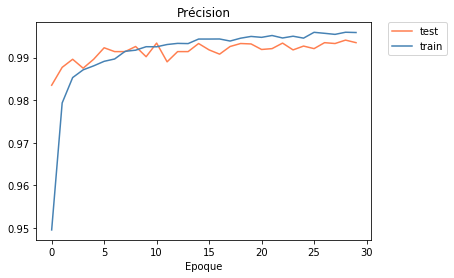

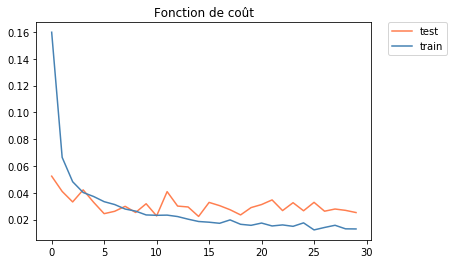

In [8]:
# Représentation des résultats
accuracy_train = historique.history['accuracy']
accuracy_test = historique.history['val_accuracy']
loss_train = historique.history['loss']
loss_test = historique.history['val_loss']
# Précision
plt.plot(accuracy_test, c='coral', label='test')
plt.plot(accuracy_train, c='steelblue', label='train')
plt.xlabel('Epoque')
plt.title('Précision')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
# Fonction de coût
plt.plot(loss_test, c='coral', label='test')
plt.plot(loss_train, c='steelblue', label='train')
plt.title('Fonction de coût')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [9]:
model.save('./model_mnist')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./model_mnist/assets
